In [47]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

# DATA

In [ ]:
# read from the 4th line to skip metadata
df_vent = pd.read_csv('ninja-wind-country-FR-current_onshore-merra2.csv', skiprows=3)

# select date from 2020 onwards and only the columns 'time' and 'FRH0'(NUTS for Brittany)
df_vent = df_vent[['time','FRH0']].loc[lambda x: x['time'] >= '2020-01-01']

In [40]:
df_vent.head()

,time,FRH0
350640,2020-01-01 00:00:00+00:00,0.199389
350641,2020-01-01 01:00:00+00:00,0.176837
350642,2020-01-01 02:00:00+00:00,0.154192
350643,2020-01-01 03:00:00+00:00,0.143311
350644,2020-01-01 04:00:00+00:00,0.137633


In [ ]:
chemin_dossier = 'files'

tous_les_fichiers = os.listdir(chemin_dossier)
liste_dfs = []

for fichier in tous_les_fichiers:
    if fichier.endswith('.csv'):
        chemin = os.path.join(chemin_dossier, fichier)
        
        df = pd.read_csv(chemin, sep='\t')
        liste_dfs.append(df)

# Concaténation
if liste_dfs:
    df_prices = pd.concat(liste_dfs, ignore_index=True)


df_prices = df_prices[['DateTime(UTC)', 'Price[Currency/MWh]', 'AreaDisplayName']].loc[lambda x: x['AreaDisplayName'] == 'France (FR)']\
    .drop(columns=['AreaDisplayName'])

#ordonner dans l'ordre chronologique
df_prices = df_prices.sort_values(by='DateTime(UTC)')

In [41]:
df_prices.head()

,DateTime(UTC),Price[Currency/MWh]
1657208,2020-01-01 00:00:00,38.60
1657209,2020-01-01 01:00:00,36.55
1657210,2020-01-01 02:00:00,32.32
1657211,2020-01-01 03:00:00,30.85
1657212,2020-01-01 04:00:00,30.14


# Wind Plant

Let's consider a wind plant with a capacity of 10 MWh

In [42]:
df_vent['power'] = df_vent['FRH0'] * 10  # 10 MWh capacity

/var/folders/jz/8bdshx0d3tn2d23tv53d10ww0000gn/T/ipykernel_89139/444138410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vent_2020['time'] = pd.to_datetime(df_vent_2020['time'])


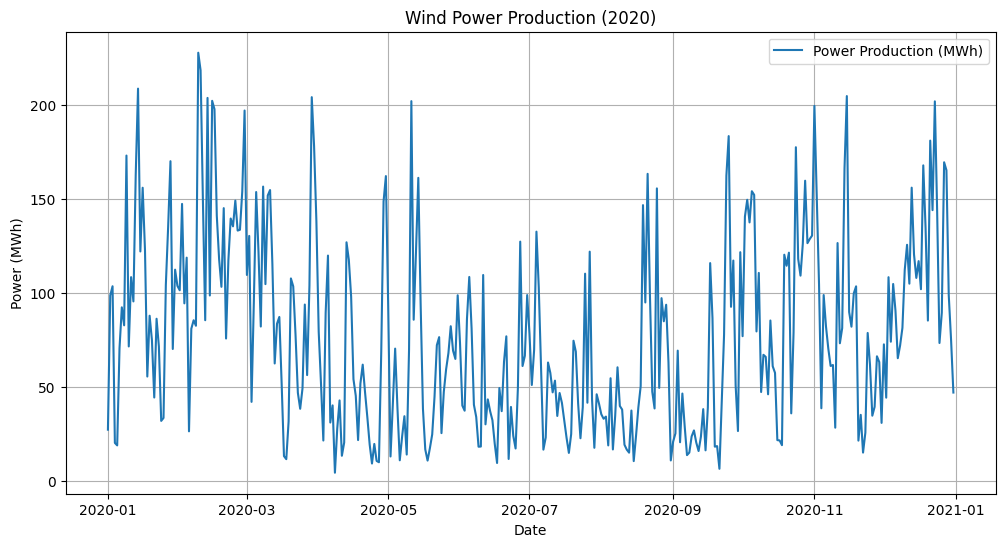

In [50]:
#plot daily power production for the year 2020
df_vent_2020 = df_vent.loc[lambda x: x['time'] < '2021-01-01']
#agregate by day
df_vent_2020['time'] = pd.to_datetime(df_vent_2020['time'])
df_vent_2020 = df_vent_2020.set_index('time').resample('D').sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df_vent_2020['time']), df_vent_2020['power'], label='Power Production (MWh)')
plt.title('Wind Power Production (2020)')
plt.xlabel('Date')
plt.ylabel('Power (MWh)')
plt.legend()
plt.grid()
plt.show()

# Battery model

- Energy capacity : 10 MWh
- power limit : 10 MW 
- efficiency : 0.9

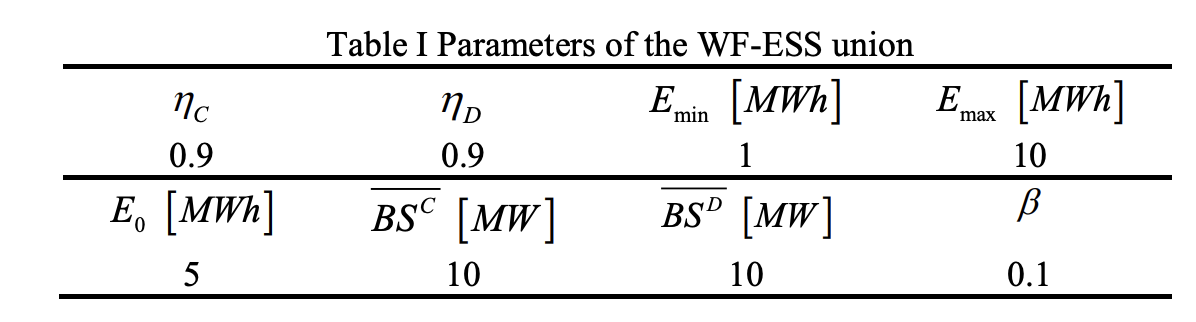